## Introduction

Welcome to **CS148 - Data Science Fundamentals!** As we're planning to move through topics aggressively in this course, to start out, we'll look to do an end-to-end walkthrough of a datascience project, and then ask you to replicate the code yourself for a new dataset. 

**Please note: We don't expect you to fully grasp everything happening here in either code or theory. This content will be reviewed throughout the quarter. Rather we hope that by giving you the full perspective on a data science project it will better help to contextualize the pieces as they're covered in class** 

In that spirit, we will first work through an example project from end to end to give you a feel for the steps involved. 

Here are the main steps:

1. Get the data
2. Visualize the data for insights
3. Preprocess the data for your machine learning algorithm
4. Select a machine learning model and train it 
5. Evaluate its performance



## Working with Real Data

It is best to experiment with real-data as opposed to aritifical datasets. 

There are many different open datasets depending on the type of problems you might be interested in!

Here are a few data repositories you could check out:
- [UCI Datasets](http://archive.ics.uci.edu/ml/)
- [Kaggle Datasets](kaggle.com)
- [AWS Datasets](https://registry.opendata.aws)

Below we will run through an California Housing example collected from the 1990's.

## Setup

We'll start by importing a series of libraries we'll be using throughout the project.

In [1]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
#assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt


## Intro to Data Exploration Using Pandas

In this section we will load the dataset, and visualize different
features using different types of plots.

Packages we will use:
- **[Pandas](https://pandas.pydata.org):** is a fast, flexibile and expressive data structure widely used for tabular and multidimensional datasets.
- **[Matplotlib](https://matplotlib.org)**: is a 2d python plotting library which you can use to create quality figures (you can plot almost anything if you're willing to code it out!)
    - other plotting libraries:[seaborn](https://seaborn.pydata.org), [ggplot2](https://ggplot2.tidyverse.org)

Note: If you're working in CoLab for this project, the CSV file first has to be loaded into the environment. This can be done manually using the sidebar menu option, or using the following code here. 

If you're running this notebook locally on your device, simply proceed to the next step.

In [2]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

We'll now begin working with Pandas. Pandas is the principle library for data management in python. It's primary mechanism of data storage is the dataframe, a two dimensional table, where each column represents a datatype, and each row a specific data element in the set. 

To work with dataframes, we have to first read in the csv file and convert it to a dataframe using the code below.

In [4]:
# We'll now import the holy grail of python datascience: Pandas!
import pandas as pd
housing = pd.read_csv('housing.csv')


In [5]:
housing.head() # show the first few elements of the dataframe
               # typically this is the first thing you do
               # to see how the dataframe looks like

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A dataset may have different types of features
- real valued
- Discrete (integers)
- categorical (strings)
- Boolean 

The two categorical features are essentialy the same as you can always map a categorical string/character to an integer. 

In the dataset example, all our features are real valued floats, except ocean proximity which is categorical.

In [6]:
# to see a concise summary of data types, null values, and counts
# use the info() method on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# you can access individual columns similarly
# to accessing elements in a python dict
housing["ocean_proximity"].head() # added head() to avoid printing many columns..

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [8]:
# to access a particular row we can use iloc
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age        21.0
total_rooms             7099.0
total_bedrooms          1106.0
population              2401.0
households              1138.0
median_income           8.3014
median_house_value    358500.0
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [9]:
# one other function that might be useful is
# value_counts(), which counts the number of occurences
# for categorical features
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# The describe function compiles your typical statistics for each
# column
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### If you want to learn about different ways of accessing elements or other functions it's useful to check out the getting started section [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)

## Let's start visualizing the dataset

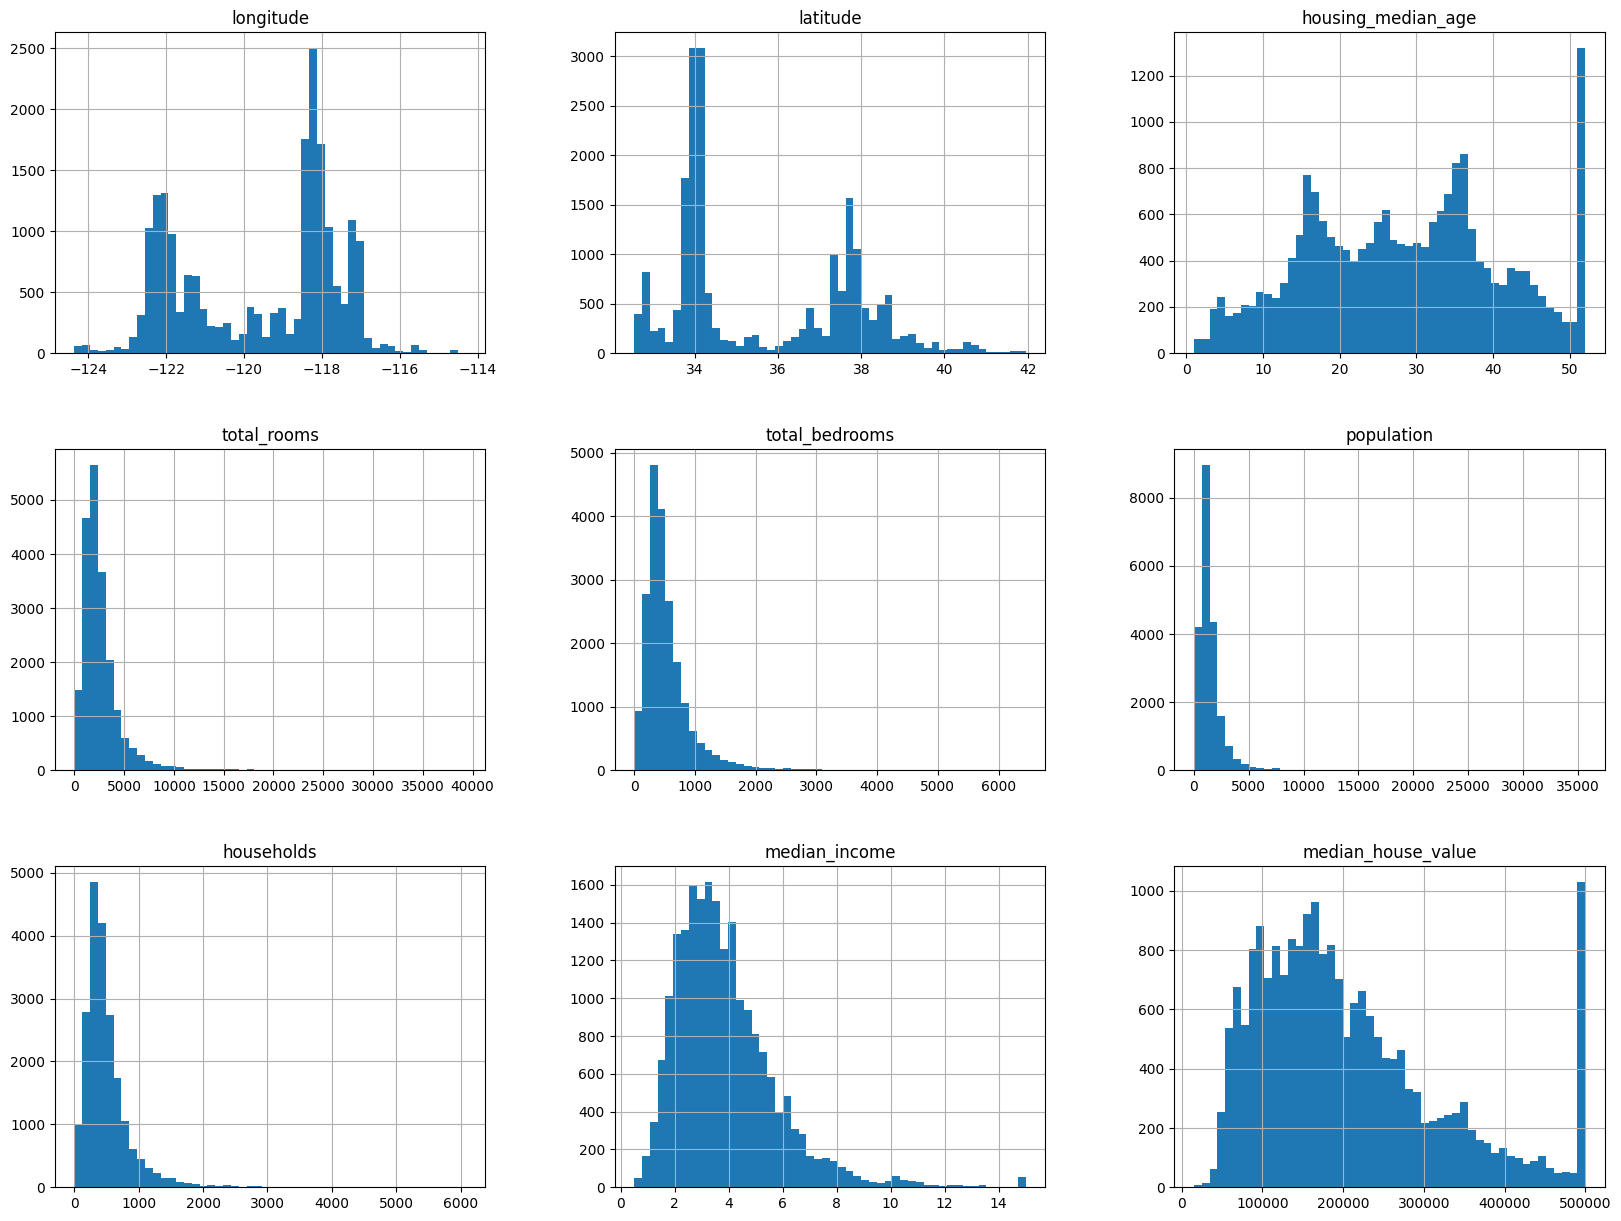

In [11]:
# We can draw a histogram for each of the dataframes features
# using the hist function
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show() # pandas internally uses matplotlib, and to display all the figures
           # the show() function must be called

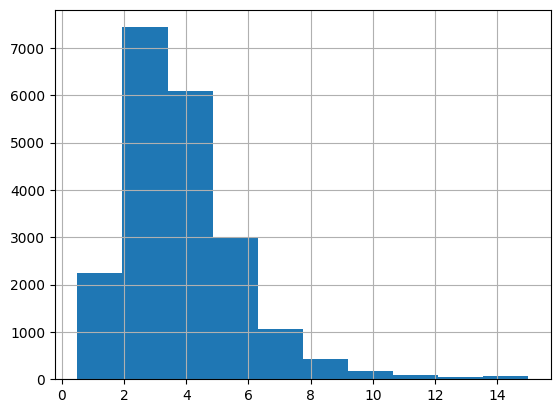

In [12]:
# if you want to have a histogram on an individual feature:
housing["median_income"].hist()
plt.show()

We can convert a floating point feature to a categorical feature
by binning or by defining a set of intervals. 

For example, to bin the 
households based on median_income we can use the pd.cut function

In [ ]:
# assign each bin a categorical value [1, 2, 3, 4, 5] in this case.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

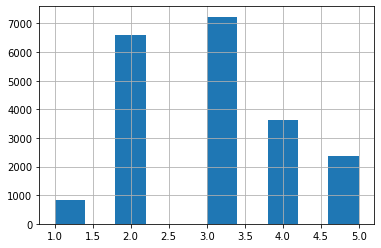

In [ ]:
housing["income_cat"].hist()

#### Next let's visualize the household incomes based on latitude & longitude coordinates

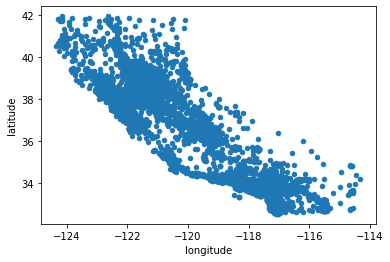

In [ ]:
## here's a not so interestting way plotting it
housing.plot(kind="scatter", x="longitude", y="latitude")

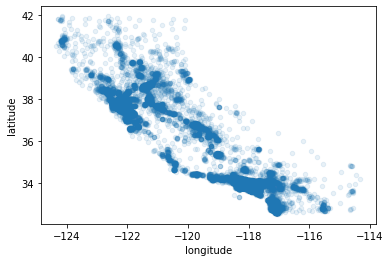

In [ ]:
# we can make it look a bit nicer by using the alpha parameter, 
# it simply plots less dense areas lighter.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

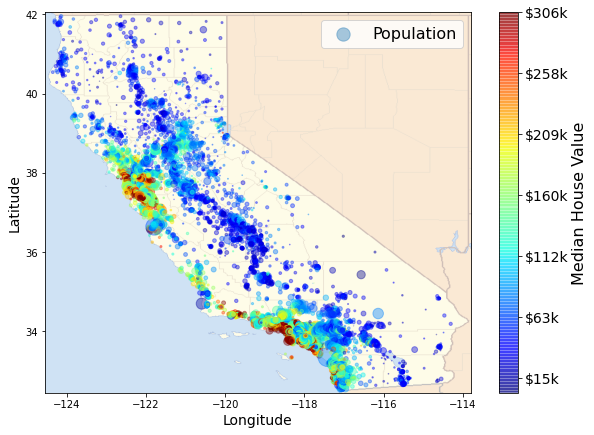

In [ ]:
# A more interesting plot is to color code (heatmap) the dots
# based on income. The code below achieves this

# Please note: In order for this to work, ensure that you've loaded an image 
# of california (california.png) into this directory prior to running this

import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cb.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

Not suprisingly, the most expensive houses are concentrated around the San Francisco/Los Angeles areas.

Up until now we have only visualized feature histograms and basic statistics. 

When developing machine learning models the predictiveness of a feature for a particular target of intrest is what's important.

It may be that only a few features are useful for the target at hand, or features may need to be augmented by applying certain transfomrations. 

None the less we can explore this using correlation matrices.

In [ ]:
corr_matrix = housing.corr()

In [ ]:
# for example if the target is "median_house_value", most correlated features can be sorted
# which happens to be "median_income". This also intuitively makes sense.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd296e89a0>,
      dtype=object)

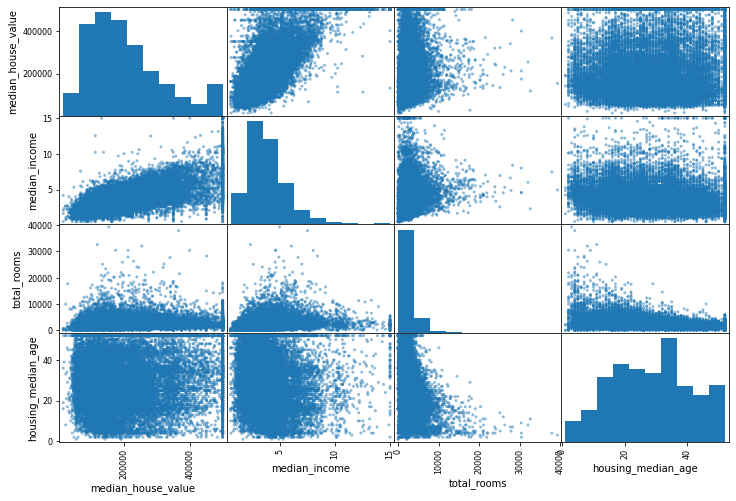

In [ ]:
# the correlation matrix for different attributes/features can also be plotted
# some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

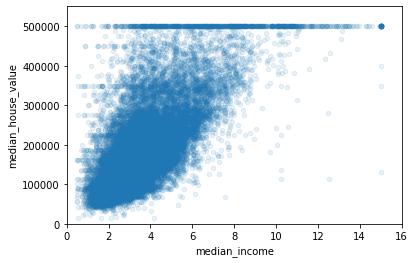

In [ ]:
# median income vs median house vlue plot plot 2 in the first row of top figure
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [ ]:
# obtain new correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

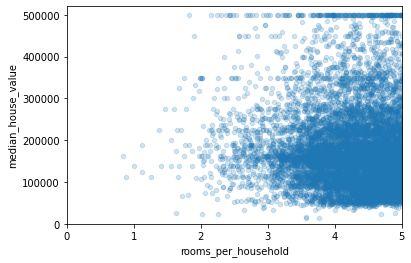

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

## Preparing Dastaset for ML

### Augmenting Features
New features can be created by combining different columns from our data set.

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- etc.

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Dealing With Incomplete Data

In [ ]:
# have you noticed when looking at the dataframe summary certain rows 
# contained null values? we can't just leave them as nulls and expect our
# model to handle them for us...
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat


In [ ]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1: simply drop rows that have null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2: drop the complete feature

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


In [ ]:
median = housing["total_bedrooms"].median() 
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3: replace na values with median values
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


Now that we've played around with this, lets finalize this approach by replacing the nulls in our final dataset


In [ ]:
housing["total_bedrooms"].fillna(median, inplace=True)

Could you think of another plausible imputation for this dataset? 

### Dealing with Non-Numeric Data

So we're almost ready to feed our dataset into a machine learning model, but we're not quite there yet! 

Generally speaking all models can only work with numeric data, which means that if you have Categorical data you want included in your model, you'll need to do a numeric conversion. We'll explore this more later, but for now we'll take one approach to converting our `ocean_proximity` field into a numeric one.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
housing['ocean_proximity'] = labelencoder.fit_transform(housing['ocean_proximity'])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,3


### Divide up the Dataset for Machine Learning

After having cleaned your dataset you're ready to train your machine learning model. 

To do so you'll aim to divide your data into:
- train set
- test set

In some cases you might also have a validation set as well for tuning hyperparameters (don't worry if you're not familiar with this term yet..)

In supervised learning setting your train set and test set should contain (**feature**, **target**) tuples. 
 - **feature**: is the input to your model
 - **target**: is the ground truth label
     - when target is categorical the task is a classification task
     - when target is floating point the task is a regression task
     
We will make use of **[scikit-learn](https://scikit-learn.org/stable/)** python package for preprocessing. 

Scikit learn is pretty well documented and if you get confused at any point simply look up the function/object!

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# let's first start by creating our train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [ ]:
housing_training = train_set.drop("median_house_value", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
housing_labels = train_set["median_house_value"].copy()

In [ ]:
housing_testing = test_set.drop("median_house_value", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
housing__test_labels = test_set["median_house_value"].copy()

### Select a model and train

Once we have prepared the dataset it's time to choose a model.

As our task is to predict the median_house_value (a floating value), regression is well suited for this.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_training, housing_labels)




Predictions: [412720.84851599 308250.79784537 236395.96466479 191878.53496752
 252722.41196865]
Actual labels: [500001.0, 162500.0, 204600.0, 159700.0, 184000.0]


In [ ]:
# let's try our model on a few testing instances
data = housing_testing.iloc[:5]
labels = housing__test_labels.iloc[:5]

print("Predictions:", lin_reg.predict(data))
print("Actual labels:", list(labels))

Predictions: [412720.84851599 308250.79784537 236395.96466479 191878.53496752
 252722.41196865]
Actual labels: [500001.0, 162500.0, 204600.0, 159700.0, 184000.0]


We can evaluate our model using certain metrics, a fitting metric for regresison is the mean-squared-loss

$$L(\hat{Y}, Y) = \sum_i^N (\hat{y_i} - y_i)^2$$

where $\hat{y}$ is the predicted value, and y is the ground truth label. 

In [ ]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(housing_testing)
mse = mean_squared_error(housing__test_labels, preds)
rmse = np.sqrt(mse)
rmse

68330.90371034428

Is this a good result? What do you think an acceptable error rate is for this sort of problem?

# TODO: Applying the end-end ML steps to a different dataset.

Ok now it's time to get to work! We will apply what we've learnt to another dataset (airbnb dataset). For this project we will attempt to **predict the airbnb rental price based on other features in our given dataset.**

# Visualizing Data 


### Load the data + statistics

Let's do the following set of tasks to get us warmed up:
- load the dataset
- display the first few rows of the data
- drop the following columns: name, host_id, host_name, last_review, neighbourhood
- display a summary of the statistics of the loaded data

### Some Basic Visualizations

Let's try another popular python graphics library: Plotly.

You can find documentation and all the examples you'll need here: [Plotly Documentation](https://plotly.com/python/basic-charts/)


Let's start out by getting a better feel for the distribution of rentals in the market. 

####Generate a pie chart showing the distribution of rental units across NYC's 5 Buroughs (`neighbourhood_groups` in the dataset)####

In [1]:
import plotly.express as px


#### Plot the total number_of_reviews per neighbourhood_group

We now want to see the total number of reviews left for each neighborhood group in the form of a Bar Chart (where the X-axis is the neighbourhood group and the Y-axis is a count of review. 

This is a two step process:
1.   You'll have to sum up the reviews per neighbourhood group **(hint! try using the groupby function)**
2.   Then use Plotly to generate the graph 





### Plot a map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ).

For reference you can use the Matplotlib code above to replicate this graph here. 

Now try to recreate this plot using Plotly's Scatterplot functionality. Note that the increased interactivity of the plot allows for some very cool functionality

### Use Plotly to plot the average price of room types in Brooklyn who have at least 10 Reviews. 

Like with the previous example you'll have to do a little bit of data engineering before you actually generate the plot. 

Generally I'd recommend the following series of steps:
1. Filter the data by neighborhood group and number of reviews to arrive at the subset of data relevant to this graph.
2. Groupby the room type
3. Take the mean of the price for each roomtype group
4. FINALLY (seriously!?!?) plot the result

# Prepare the Data

### Feature Engineering

Let's create a new binned feature, `price_cat` that will divide our dataset into quintiles (1-5) in terms of price level (you can choose the levels to assign)

Do a value count to check the distribution of values 

Now engineer at least one new feature.

### Data Imputation

Determine if there are any null-values and if there are impute them.

### Numeric Conversions

Finally, review what features in your dataset are non-numeric and convert them.

# Prepare data for Machine Learning

### Set aside 20% of the data as test test (80% train, 20% test).

Using our `StratifiedShuffleSplit` function example from above, let's split our data into a 80/20 Training/Testing split using `neighbourhood_group` to partition the dataset

Finally, remove your labels `price` from your testing and training cohorts, and create separate label features. 

# Fit a model of your choice

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using **MSE**.
Provide both **test and train set MSE values**.